In [1]:
# importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#load training data 
train_data = pd.read_csv("E:\\Ai trainning\\phase2\\kaggle\\train.csv")
train_data.head()


,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
train_data.dtypes

ID                             int64
Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [4]:
print("The shape of the dataset is {}.\n\n".format(train_data.shape))

The shape of the dataset is (5760, 15).




In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5760.0,2879.500000,1662.913107,0.0,1439.75,2879.50,4319.250,5759.00
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00


In [6]:
#Count NaN values under an entire DataFrame
train_data.isna().sum()


ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
# Count duplicates in all dataframe
print(train_data.duplicated().sum())

0


#  The correlations between variables

[Text(0, 0.5, 'ID'),
 Text(0, 1.5, 'y'),
 Text(0, 2.5, 'Hour'),
 Text(0, 3.5, 'Temperature(�C)'),
 Text(0, 4.5, 'Humidity(%)'),
 Text(0, 5.5, 'Wind speed (m/s)'),
 Text(0, 6.5, 'Visibility (10m)'),
 Text(0, 7.5, 'Dew point temperature(�C)'),
 Text(0, 8.5, 'Solar Radiation (MJ/m2)'),
 Text(0, 9.5, 'Rainfall(mm)'),
 Text(0, 10.5, 'Snowfall (cm)')]

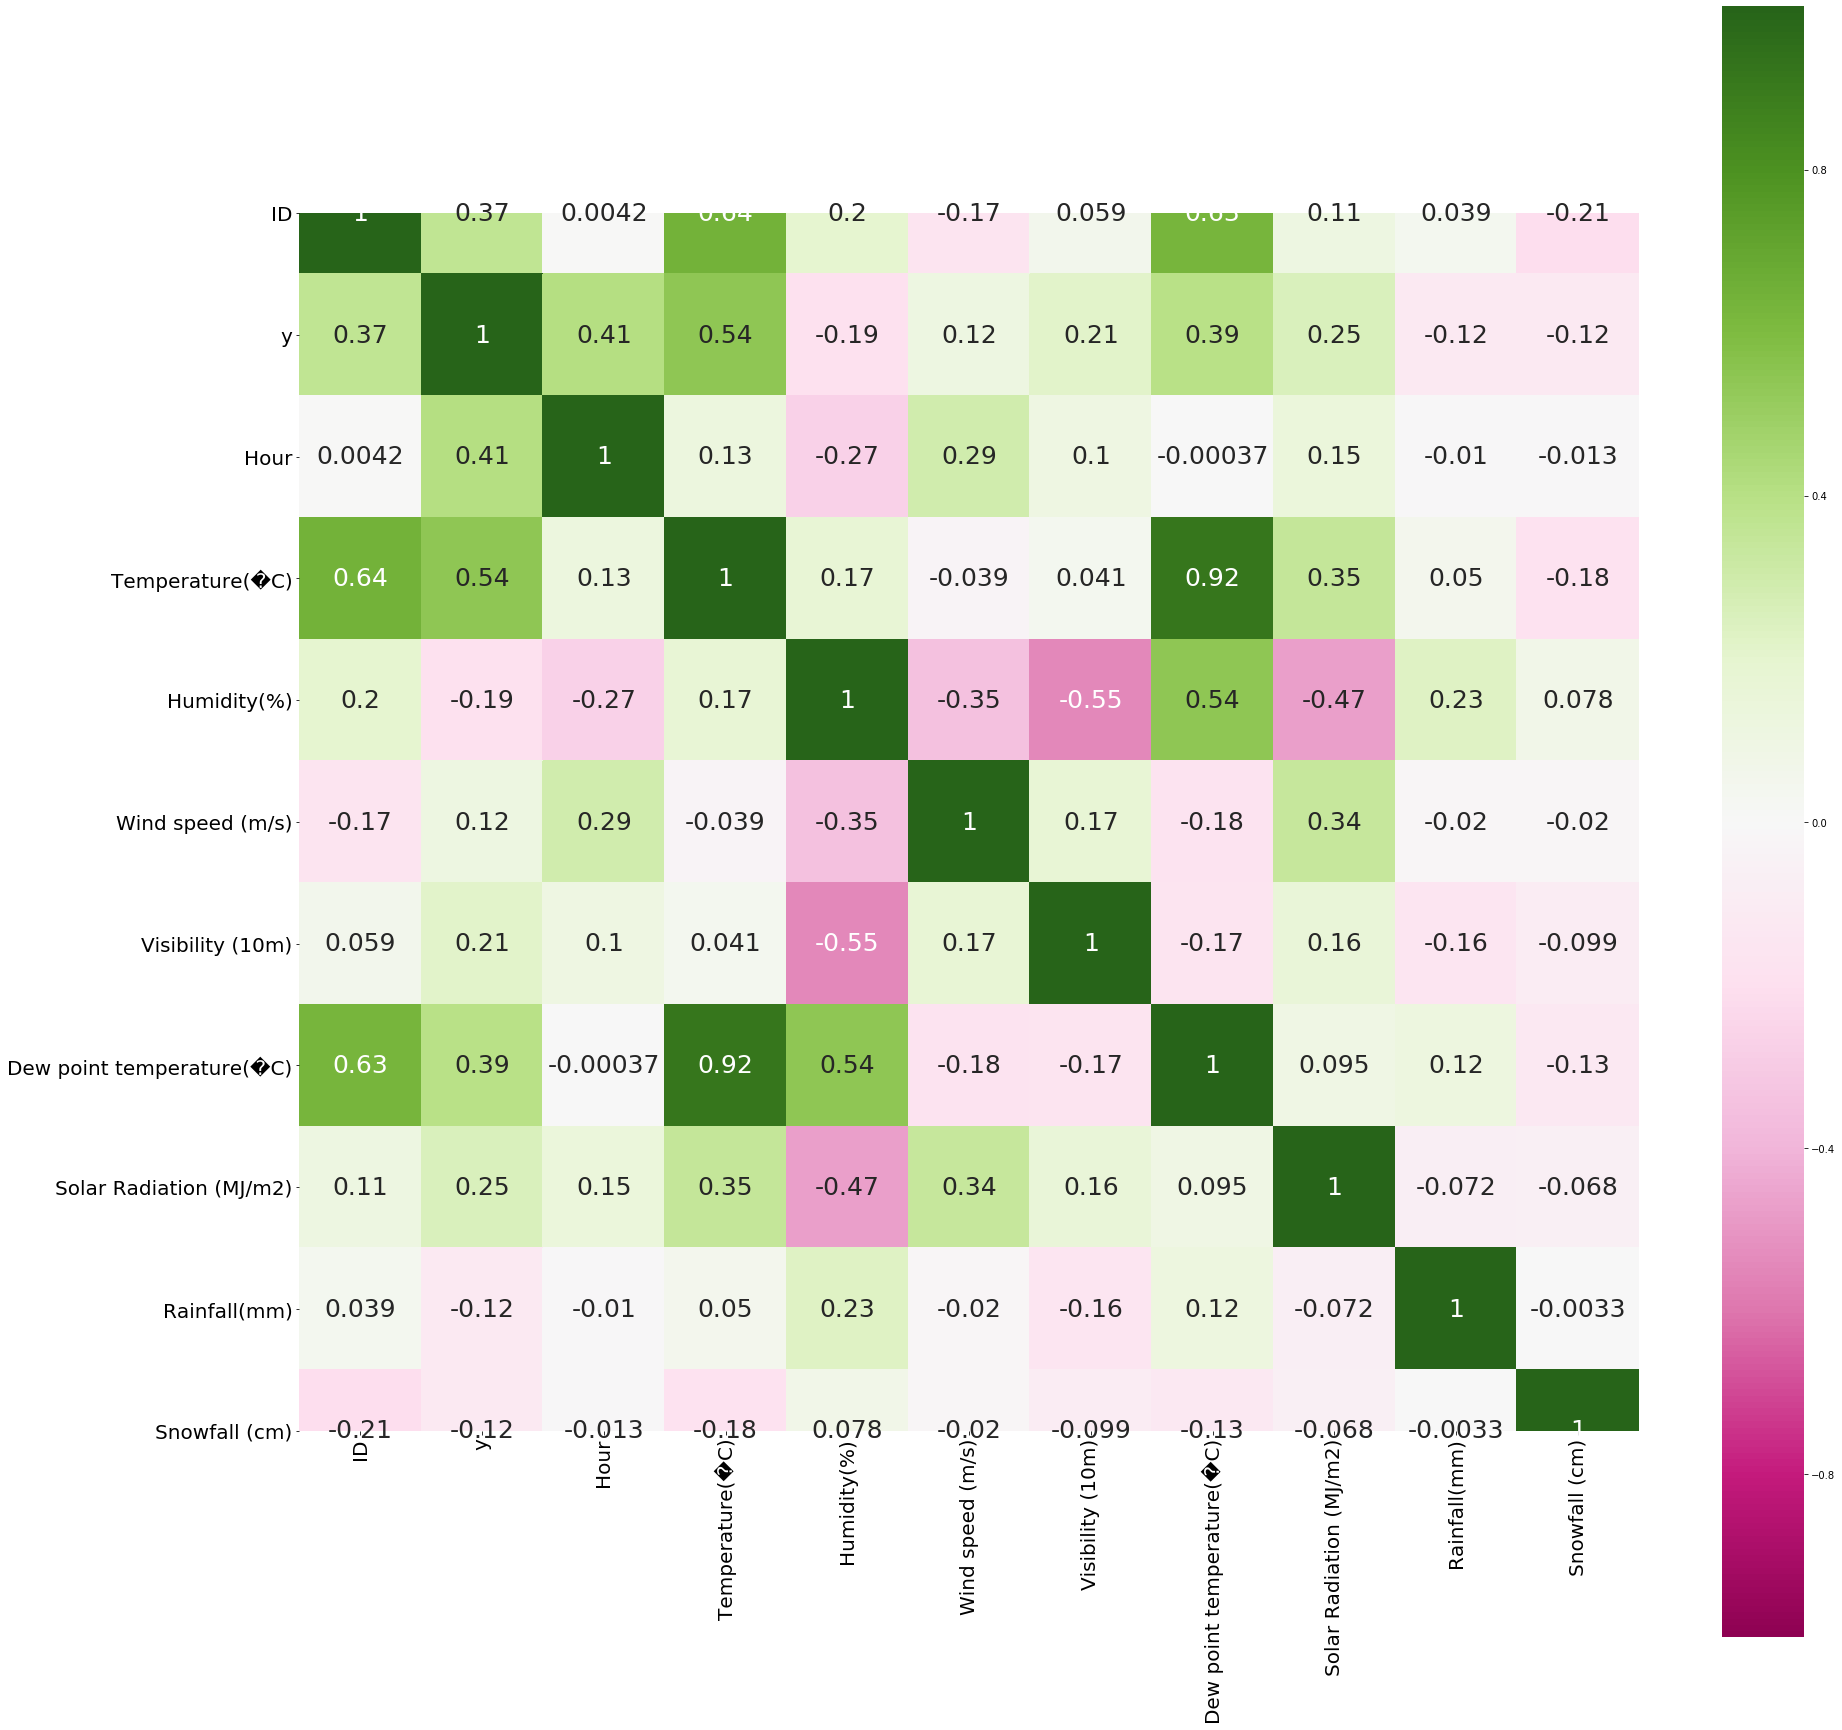

In [8]:
plt.figure(figsize=(30,30))
res = sns.heatmap(train_data.corr("pearson"),vmin = -1,vmax = 1,cmap = 'PiYG',annot = True,annot_kws={"fontsize":25},square = True)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 20)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 20)

There is a hyper correlation between Temperature and Dew point temperature so we can drop the column

In [9]:
df1Corr=pd.DataFrame(train_data.corr().unstack().sort_values(ascending=False)['y'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
y,1
Temperature(�C),0.544281
Hour,0.40718
Dew point temperature(�C),0.392454
ID,0.365359
Solar Radiation (MJ/m2),0.250601
Visibility (10m),0.214777
Wind speed (m/s),0.11638
Rainfall(mm),-0.117711
Snowfall (cm),-0.120836


In [10]:
train_data['label_day_night']=train_data['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
train_data

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Night
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Day
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes,Day
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,Night
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Night


In [11]:
train_data['Date']=pd.to_datetime(train_data['Date'],format="%d/%m/%Y")

In [12]:
train_data['WeekDay']=train_data['Date'].dt.day_name()
train_data['Month']=train_data['Date'].dt.month
train_data

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,2018-11-20,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Day,Tuesday,11
5756,5756,2018-11-20,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,Autumn,No Holiday,Yes,Day,Tuesday,11
5757,5757,2018-11-20,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,Night,Tuesday,11
5758,5758,2018-11-20,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Night,Tuesday,11


In [13]:
train_data["Date"]

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
5755   2018-11-20
5756   2018-11-20
5757   2018-11-20
5758   2018-11-20
5759   2018-11-20
Name: Date, Length: 5760, dtype: datetime64[ns]

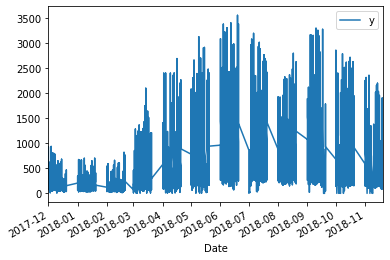

In [14]:
train_data.plot(x='Date',y='y',kind='line')


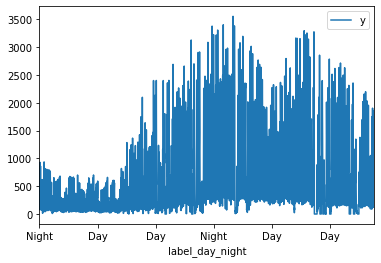

In [15]:
train_data.plot(x="label_day_night",y='y',kind='line')

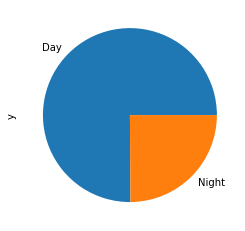

In [16]:
train_data.groupby('label_day_night').sum()['y'].plot.pie()


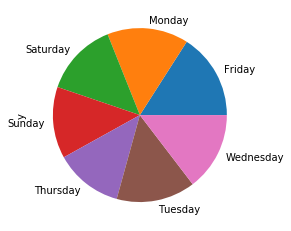

In [17]:
train_data.groupby('WeekDay').sum()['y'].plot.pie()

In [18]:
df1Seasons=pd.DataFrame(train_data.groupby('Seasons').sum()['y'].sort_values(ascending=False))
df1Seasons

,y
Seasons,
Summer,1563416
Autumn,1214630
Spring,940276
Winter,333745


In [19]:
train_data["label_day_night"].value_counts()


Day      3840
Night    1920
Name: label_day_night, dtype: int64

In [20]:
train_data["WeekDay"].value_counts()

Monday       840
Tuesday      840
Friday       840
Saturday     816
Thursday     816
Sunday       816
Wednesday    792
Name: WeekDay, dtype: int64

In [21]:
# Encoding 
train_data['Holiday'].replace({"Holiday": 0, "No Holiday": 1}, inplace=True)
train_data["label_day_night"].replace({"Night": 0, "Day": 1}, inplace=True)
train_data['WeekDay'].replace({"Saturday": 1, "Sunday": 2, "Monday": 3, "Tuesday": 4,"Wednesday":5,"Thursday":6,"Friday":7},inplace = True)
train_data['Functioning Day'].replace({"No": 0, "Yes": 1}, inplace=True)
train_data['Seasons'].replace({"Autumn": 1, "Spring": 2, "Summer": 3, "Winter": 4},inplace = True)

train_data


,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,1,1,0,7,12
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,1,1,0,7,12
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,1,1,0,7,12
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,1,1,0,7,12
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,1,1,0,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,2018-11-20,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,1,1,1,1,4,11
5756,5756,2018-11-20,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,1,1,1,1,4,11
5757,5757,2018-11-20,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,1,1,1,0,4,11
5758,5758,2018-11-20,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,1,1,1,0,4,11


In [22]:
y = train_data.y
features_columns = ['Hour','Temperature(�C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day','label_day_night','WeekDay',"Month"]
X = train_data[features_columns]
X

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,4,1,1,0,7,12
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,4,1,1,0,7,12
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,4,1,1,0,7,12
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,4,1,1,0,7,12
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,4,1,1,0,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,19,8.7,34,2.2,1857,0.0,0.0,0.0,1,1,1,1,4,11
5756,20,8.5,32,2.6,1789,0.0,0.0,0.0,1,1,1,1,4,11
5757,21,8.8,37,3.8,1750,0.0,0.0,0.0,1,1,1,0,4,11
5758,22,8.9,40,3.4,1810,0.0,0.0,0.0,1,1,1,0,4,11


In [23]:
#Data Splitting
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X, y, random_state = 42)

# Specify the model


In [30]:
from xgboost import XGBRegressor

In [31]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X,train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)
predictions = my_model.predict(val_X)
print("The accuracy of the DecisionTreeRegressor on the validation set is ", (my_model.score(val_X, val_y)))

The accuracy of the DecisionTreeRegressor on the validation set is  0.9429054348903241
